<a href="https://colab.research.google.com/github/SergiyDovgopolyk/Data_Science/blob/main/HW_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from keras import optimizers
from keras import losses
from keras import metrics
from keras import layers
from keras import models
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import to_categorical
from keras.datasets import fashion_mnist


In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

4422102/4422102 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


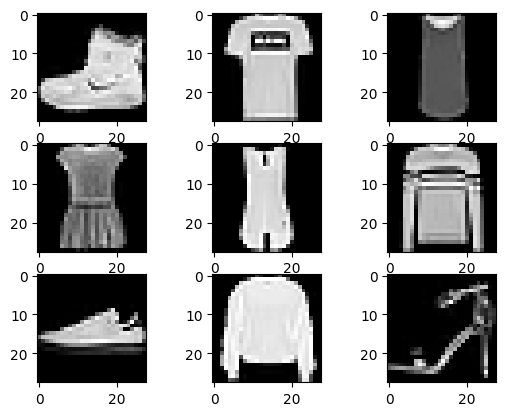

In [5]:
for i in range(9):
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()


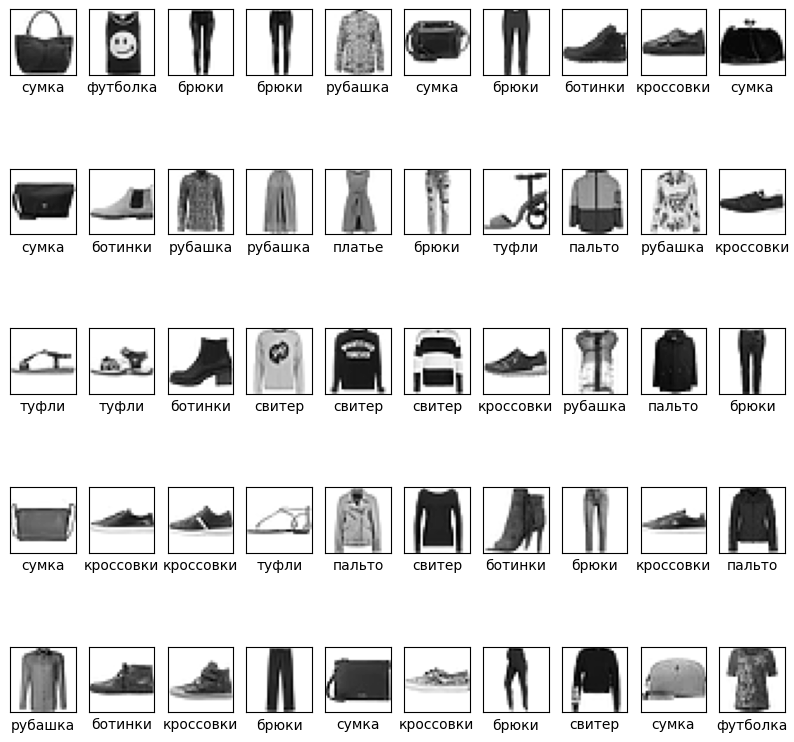

In [6]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

In [7]:
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(100, activation="relu", kernel_initializer='he_uniform'),
    Dense(10, activation="softmax")
])

# compile model
opt = 'adam'
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 13s 5ms/step - loss: 0.5035 - accuracy: 0.8134 - val_loss: 0.3666 - val_accuracy: 0.8682
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3266 - accuracy: 0.8796 - val_loss: 0.3235 - val_accuracy: 0.8815
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2744 - accuracy: 0.8989 - val_loss: 0.2957 - val_accuracy: 0.8936
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2426 - accuracy: 0.9090 - val_loss: 0.2736 - val_accuracy: 0.9034
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2174 - accuracy: 0.9193 - val_loss: 0.2629 - val_accuracy: 0.9068
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1957 - accuracy: 0.9271 - val_loss: 0.2728 - val_accuracy: 0.9046
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1782 - accuracy: 0.9325 - val_loss: 0.2590 - val_accuracy

In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Точність на тесті: {test_accuracy * 100:.2f}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.3351 - accuracy: 0.9013
Точність на тесті: 90.13%


313/313 [==============================] - 1s 2ms/step


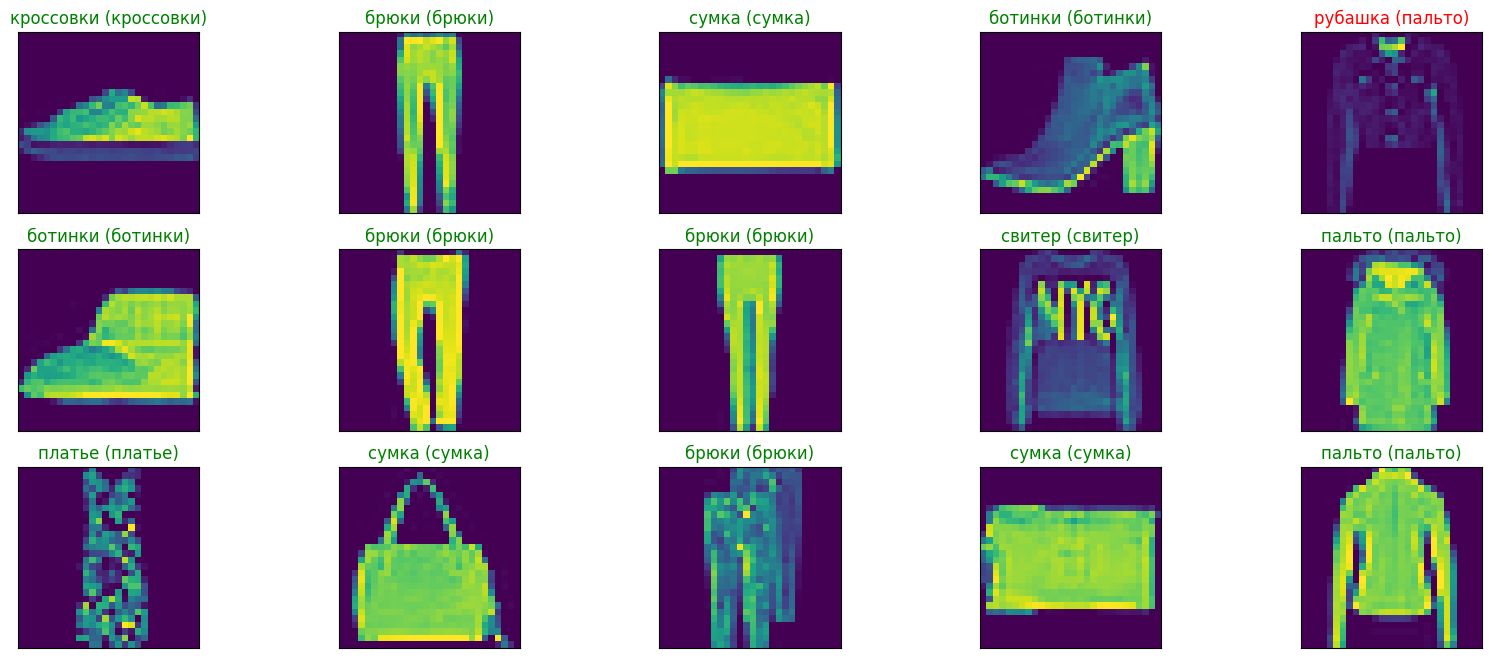

In [10]:
import numpy as np

y_hat = model.predict(x_test)

classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])

    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])

    ax.set_title("{} ({})".format(classes[predict_index],
                                  classes[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [11]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(100, activation="relu", kernel_initializer='he_uniform'),
    Dense(10, activation="softmax")
])

# compile model
opt = 'adam'
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.4856 - accuracy: 0.8215 - val_loss: 0.3376 - val_accuracy: 0.8773
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3140 - accuracy: 0.8855 - val_loss: 0.3190 - val_accuracy: 0.8837
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2697 - accuracy: 0.9003 - val_loss: 0.2842 - val_accuracy: 0.8959
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2359 - accuracy: 0.9128 - val_loss: 0.2933 - val_accuracy: 0.8928
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2094 - accuracy: 0.9234 - val_loss: 0.2736 - val_accuracy: 0.9018
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1900 - accuracy: 0.9294 - val_loss: 0.2511 - val_accuracy: 0.9098
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1688 - accuracy: 0.9359 - val_loss: 0.2786 - val_accuracy:

In [12]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Точність на тесті: {test_accuracy * 100:.2f}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.2885 - accuracy: 0.9106
Точність на тесті: 91.06%


313/313 [==============================] - 1s 2ms/step


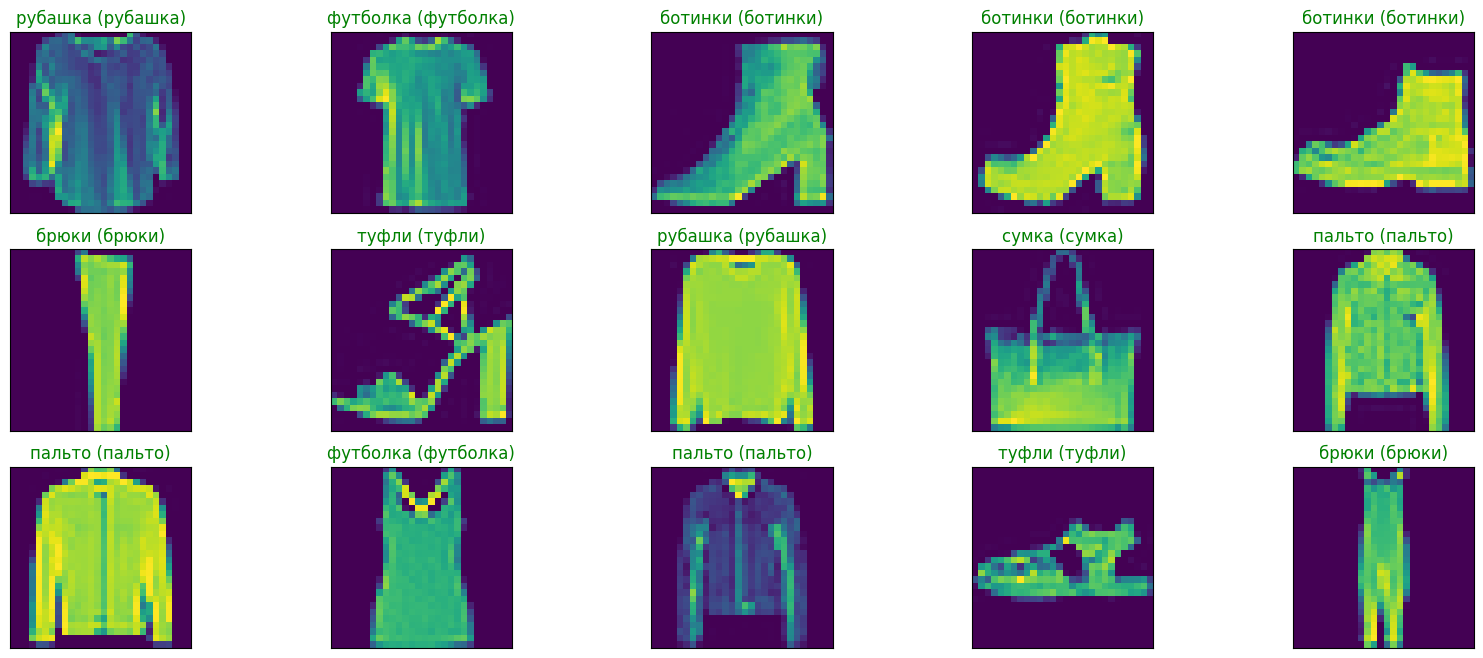

In [13]:
y_hat = model.predict(x_test)

classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])

    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])

    ax.set_title("{} ({})".format(classes[predict_index],
                                  classes[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [14]:
from numpy import mean, std
from sklearn.model_selection import KFold
from keras.utils import to_categorical

(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

trainY = to_categorical(trainY)
testY = to_categorical(testY)

trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

In [15]:

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))


opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# evaluate a model using k-fold cross-validation
scores, histories = list(), list()
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
for train_ix, test_ix in kfold.split(trainX):
    trainX_fold, trainY_fold, testX_fold, testY_fold = trainX[train_ix], trainY[train_ix], trainX[test_ix], trainY[test_ix]
    history = model.fit(trainX_fold, trainY_fold, epochs=10, batch_size=32, validation_data=(testX_fold, testY_fold), verbose=0)
    _, acc = model.evaluate(testX_fold, testY_fold, verbose=0)
    print('> %.3f' % (acc * 100.0))
    scores.append(acc)
    histories.append(history)

print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))


> 90.833
> 94.700
> 97.575
> 99.450
> 99.975
Accuracy: mean=96.507 std=3.385, n=5


In [16]:
test_loss, test_accuracy = model.evaluate(testX, testY)
print(f'Точність на тесті: {test_accuracy * 100:.2f}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.5968 - accuracy: 0.9137
Точність на тесті: 91.37%


313/313 [==============================] - 1s 2ms/step


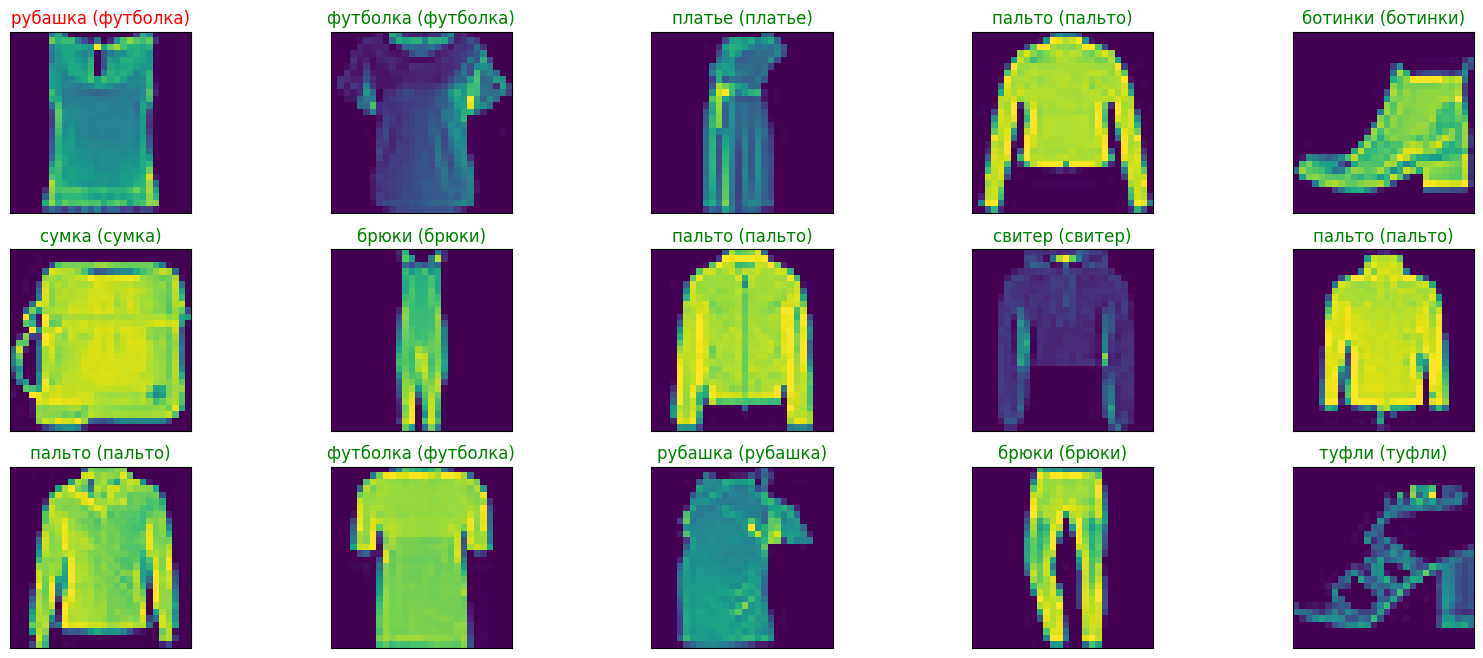

In [17]:
y_hat = model.predict(testX)

classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(testX.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])

    ax.imshow(np.squeeze(testX[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(testY[index])

    ax.set_title("{} ({})".format(classes[predict_index],
                                  classes[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [ ]:
# Замість висновку))

# Імплементація згорткової нейронної мережі дозволяє покращити результати передбачень, у порівнянні з простою багатошаровою персептронною мережею, у завданнях обробки зображень,
# а також дозволяє швидше натренувати модель, проходячи значно меншу кількість епох навчання. Це відбувається завдяки їхній здатності до виявлення локальних патернів у вхідних даних.

In [ ]:
# Завдання 2, спроба 1 (потратив багато часу на реалізацію та пошук інформації, але щось не зовсім вийшло)

In [18]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import img_to_array, array_to_img
from sklearn.model_selection import train_test_split

# Load and preprocess the fashion_mnist dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [19]:
x_train=np.dstack([x_train] * 3)
x_test=np.dstack([x_test]*3)
x_train.shape,x_test.shape

((60000, 28, 84), (10000, 28, 84))

In [20]:
x_train = x_train.reshape(-1, 28,28,3)
x_test= x_test.reshape (-1,28,28,3)
x_train.shape,x_test.shape


((60000, 28, 28, 3), (10000, 28, 28, 3))

In [21]:
x_train = x_train / 255.
x_test = x_test / 255.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [22]:
x_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_train])
x_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_test])
x_train.shape, x_test.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [23]:
x_train = x_train / 255.
x_test = x_test / 255.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [24]:
x_train, x_valid, train_label, valid_label = train_test_split(x_train,
                                                           y_train_one_hot,
                                                           test_size=0.2,
                                                           random_state=13
                                                           )

In [25]:
IMG_WIDTH = 48
IMG_HEIGHT = 48
IMG_DEPTH = 3
BATCH_SIZE = 16

x_train = preprocess_input(x_train)
x_valid = preprocess_input(x_valid)
x_test  = preprocess_input (x_test)

In [26]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH)
                 )

conv_base.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [27]:
model = Sequential([
    conv_base,
    Flatten(),
    Dense(64, activation="relu"),
    Dense(100, activation="relu", kernel_initializer='he_uniform'),
    Dense(10, activation="softmax")
])

opt = Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, train_label, batch_size=32, epochs=10, validation_data=(x_valid, valid_label), verbose=1)

Epoch 1/10
1500/1500 [==============================] - 24s 14ms/step - loss: 2.3177 - accuracy: 0.0960 - val_loss: 2.3035 - val_accuracy: 0.1028
Epoch 2/10
1500/1500 [==============================] - 22s 15ms/step - loss: 2.3040 - accuracy: 0.1005 - val_loss: 2.3052 - val_accuracy: 0.0992
Epoch 3/10
1500/1500 [==============================] - 21s 14ms/step - loss: 2.3038 - accuracy: 0.0994 - val_loss: 2.3058 - val_accuracy: 0.0993
Epoch 4/10
1500/1500 [==============================] - 23s 15ms/step - loss: 2.3041 - accuracy: 0.0981 - val_loss: 2.3040 - val_accuracy: 0.0983
Epoch 5/10
1500/1500 [==============================] - 22s 15ms/step - loss: 2.3039 - accuracy: 0.1025 - val_loss: 2.3040 - val_accuracy: 0.1028
Epoch 6/10
1500/1500 [==============================] - 23s 15ms/step - loss: 2.3040 - accuracy: 0.1000 - val_loss: 2.3031 - val_accuracy: 0.0983
Epoch 7/10
1500/1500 [==============================] - 23s 15ms/step - loss: 2.3039 - accuracy: 0.0995 - val_loss: 2.3043 -

In [35]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Точність на тесті: {test_accuracy * 100:.2f}%')

313/313 [==============================] - 2s 8ms/step - loss: 0.2429 - accuracy: 0.9204
Точність на тесті: 92.04%


In [ ]:
# Завдання 2, спроба 2

In [31]:
# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# Preprocess the data
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [32]:
# Define the VGG16 model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),

    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((1, 1), strides=(1, 1)),  # Reduce the pool size to 1x1 if input is 1x1

    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),  # Dropout for regularization
    Dense(4096, activation='relu'),
    Dropout(0.5),  # Dropout for regularization
    Dense(10, activation='softmax')
])

# Compile the model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/10
1688/1688 [==============================] - 46s 25ms/step - loss: 0.8248 - accuracy: 0.6893 - val_loss: 0.3804 - val_accuracy: 0.8513
Epoch 2/10
1688/1688 [==============================] - 42s 25ms/step - loss: 0.3617 - accuracy: 0.8669 - val_loss: 0.3115 - val_accuracy: 0.8797
Epoch 3/10
1688/1688 [==============================] - 42s 25ms/step - loss: 0.2933 - accuracy: 0.8919 - val_loss: 0.3212 - val_accuracy: 0.8883
Epoch 4/10
1688/1688 [==============================] - 48s 28ms/step - loss: 0.2531 - accuracy: 0.9074 - val_loss: 0.2438 - val_accuracy: 0.9093
Epoch 5/10
1688/1688 [==============================] - 42s 25ms/step - loss: 0.2249 - accuracy: 0.9173 - val_loss: 0.2417 - val_accuracy: 0.9103
Epoch 6/10
1688/1688 [==============================] - 42s 25ms/step - loss: 0.2020 - accuracy: 0.9257 - val_loss: 0.2397 - val_accuracy: 0.9132
Epoch 7/10
1688/1688 [==============================] - 41s 25ms/step - loss: 0.1807 - accuracy: 0.9324 - val_loss: 0.2281 -

In [33]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Точність на тесті: {test_accuracy * 100:.2f}%')

313/313 [==============================] - 2s 7ms/step - loss: 0.2429 - accuracy: 0.9204
Точність на тесті: 92.04%


313/313 [==============================] - 2s 6ms/step


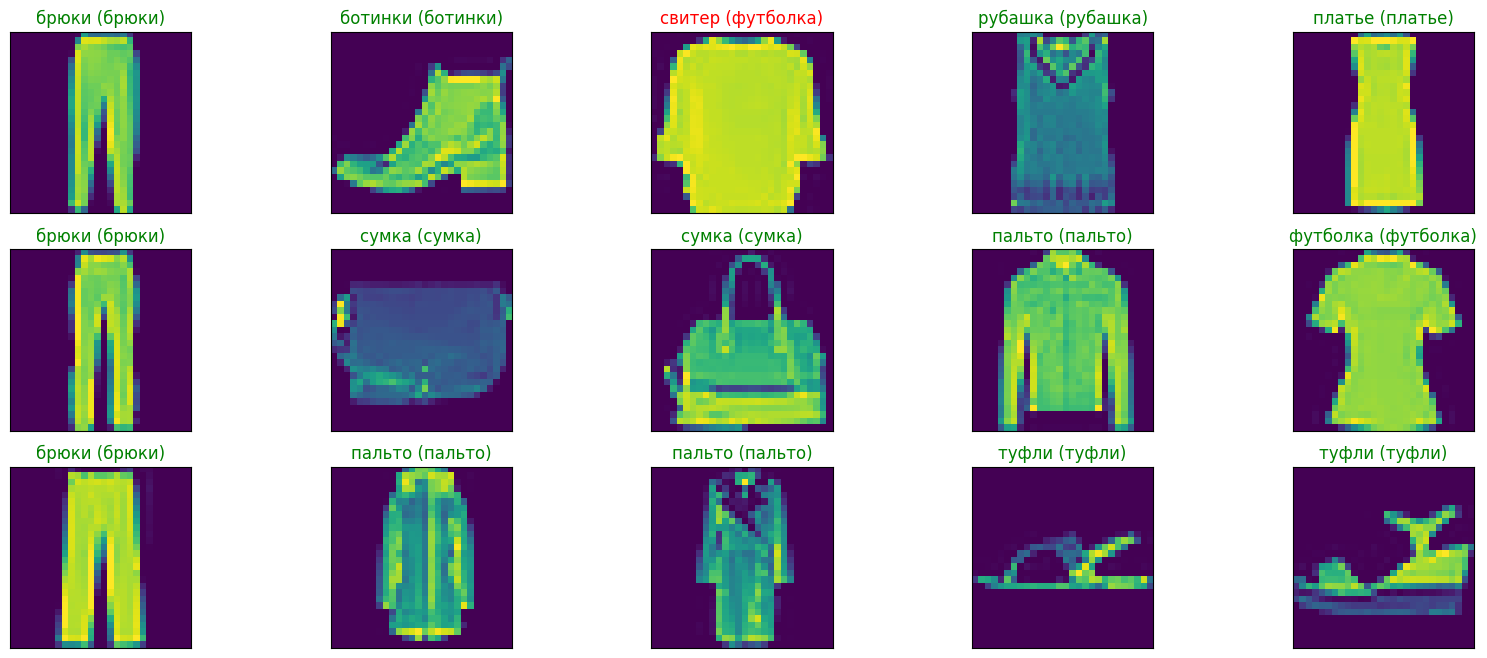

In [34]:
y_hat = model.predict(x_test)

classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])

    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])

    ax.set_title("{} ({})".format(classes[predict_index],
                                  classes[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [ ]:
# Висновок
# З використанням VGG16 вдалося краще натренувати модель та покращити передбачення.
# Також варто відмітити, що після аналізу логів, можна побачити що дана модель досягла показників моделей з попередніх завдань за меншу кількість епох.